# Analysis 1
- Created a list containing most frequently used frdulent words
- Read each mail between 1999-2001 of top convicts and storing words from email in a list
- Compared the email body words with fradulent words and calculating their total occurrence for all convicts
- Sorted and displayed top 5 fradulent words that top convicts used between 1999-2001
- Plotted a chart to display the collected information visually

In [1]:
# Importing the required modules
import os
import re
import time
import nltk
import operator
import datetime
import email.utils
import numpy as np # Used only for arranging y axis values on graph plotted
from email.parser import Parser 
from matplotlib import pyplot as plt

In [2]:
all_employees = ['lay-k', 'skilling-j', 'whalley-g'] # Prepared a list for convicts directories

emp_msg_list = [] # Creating an empty list to store employee names and their emails

emp_name_list = [] # Creating an empty list which will store employee name and local path for source directory

for emp in all_employees: # Looping through all employees
    filepath_emp = '~\\midterm\\data\\enron\\maildir\\' + emp # Creating path to employee directory
    filepath_actual = os.path.expanduser(filepath_emp) # Creating actual path acccording to OS
    emp_name_list.append([emp,filepath_actual]) # Populating the list with emp name and their directory path

for emp, emp_path in emp_name_list: # Looping through each employee and their directory
    for subdir, dirs, files in os.walk(emp_path): # Looping through each files present under directories and sub directories
        for file in files: # Looping through each found directories, subdirectories or files
            if(file[0] != '.'): # If selected file is a file and not a directory
                
                try: # Putting whole code in a try except block to catch unwanted errors
                    response = open(os.path.join(subdir, file), 'r', errors = 'ignore') # Extracting the email
                    email_emp = Parser().parsestr(response.read()) # Parsing the extracted email
                    
                    email_date = email.utils.parsedate(email_emp['Date']) # Extracting the date from parsed email
                    
                    if email_date[0] in [1999, 2000, 2001]: # Putting a check for emails through 1999-2001
                        # Removing all punctuations after tokenizing the email body
                        remove_punctuations=[re.sub(r'[^A-Za-z0-9]+','', x) for x in nltk.word_tokenize(email_emp.get_payload())]
                        # Removing empty strings, if any
                        remove_empty_string = [x for x in remove_punctuations if x] 
                        # Populating the list with emaildate and words from email
                        emp_msg_list.append((email_date[0], remove_empty_string)) 
                        
                except:
                    pass

In [3]:
count_emp = 0 # Creating a temporary variable and assigning value 0 to it
# Creating a list which contains most occurring fradulent words in scams worldwide
suspicious_keywords = ['criminal', 'offence', 'violation', 'illegal', 'investment', 'inspection', 'earning', 'payment', 'cover']
# Creating a list to store emaildate, freadulent words and its count from tokenized email of an employee
suspicious_keywords_list = []

for x, y in emp_msg_list: # Looping through each date and words used in emails on that date
    for a in suspicious_keywords: # Looping through each fradulent words
        for z in y: # Looping through each word of a email of particular date
            if z.lower() == a: # If word is same as fraudulent word
                count_emp = count_emp + 1 # Increment the temp count by 1
            else: # If word not same as fraudulent word
                continue # Goto next word
        if count_emp > 0: # If tem count > 0, it means that is a fradulent word
            suspicious_keywords_list.append([x, a, count_emp]) # Add that word alongwith its frequency in a dictionary
        count_emp = 0 # Reassign temp count to 0 for outer for loop

count_emp_final = 0 # Creating a temporary variable and assigning value 0 to it
consolidated_dict = {} # Creating an empty dictionary to store fradulent words alongwith its frequency for all employees listed

for x in suspicious_keywords: # Looping through each fradulent word
    # Looping through each fradulent word to calculate its total sum as they can occur more than once in an email
    for y in suspicious_keywords_list: 
        if x == y[1]:
            count_emp_final = count_emp_final + y[2] # Calculating total sum of a fradulent word    
    consolidated_dict.update({x:count_emp_final}) # Add fradulent words and their total frequency in a dictionary
    count_emp_final = 0 # Reassiging the temp variable to 0 for outer for loop

In [4]:
# Sorting the dictionary in descending order of frequency
consolidate_dict_sorted = sorted(consolidated_dict.items(), key=operator.itemgetter(1), reverse = True)

# Displaying top 5 results
print(consolidate_dict_sorted[:5])

[('investment', 1388), ('payment', 291), ('cover', 253), ('violation', 102), ('criminal', 69)]


In [5]:
y_values = [x[1] for x in consolidate_dict_sorted[:5]] # Storing top 5 frequencies to be used for y-axis
x_values = [y[0] for y in consolidate_dict_sorted[:5]] # Storing top 5 words to be used for x-axis

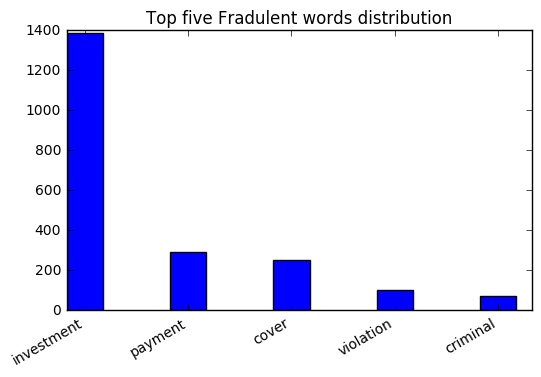

In [6]:
fig = plt.figure() # Calling the figure function from matplotlib module
ax = fig.add_subplot(111) # Creating a subplot
ax.set_title("Top five Fradulent words distribution") # Setting up the title for plot

width = .35 # Setting the width between each element of histogram
ind = np.arange(len(y_values)) # Arranging the frequencies on y axis
plt.bar(ind, y_values, width=width) # Plotting the chart
plt.xticks(ind + width / 2, x_values) # Displaying the tick in the middle on x axis

fig.autofmt_xdate() # Formatting the x axis to make values readable

# Creating a path to store the created chart
save_path = os.path.expanduser('~\\midterm\\que1\\ana_1\\Top five Fradulent words distribution.pdf') 

plt.savefig(save_path) # Saving the chart to desired location
 
plt.show() # Displaying the chart